# Group 3 Members:
## Venkata Abhishek
## Roshan Sinha
## Shubham Saini
## Vishal Gandham
## YuanZhong Zheng

# Project Description: Exploratory Data Analysis using Python and Pandas

Objective: The objective of this project is to perform exploratory data analysis on the sector information of the S&P 500 using Python and Pandas.

Your presentation should have four parts, with the tasks outlined below:

## Descriptive Statistics and Pie Charts
1. Download sector information on the S&P 500 from a web source and perform data prepping and scrubbing.
2. Explore the distribution of sector weights using descriptive statistics such as max, min, percentiles, mean, and standard deviation.
3. Visualize the distribution of sectors using a pie chart.

## Correlation Matrix and Heat Maps
4. Perform data prepping and scrubbing on sector weight data over a 20-year period and convert the data provided as a string to a pandas dataframe with numerical value types.
5. Calculate a correlation matrix of the sector weights and plot a heat map.
6. Discuss which pairs of sectors have high correlations and which pairs have low correlations, and provide a story as to why this might be the case.

## Histograms and Conditional Distributions
7. Plot a histogram of the weights of the Consumer Discretionary in the past years, and estimate the probability density function (PDF) using kernel density estimation (KDE).
8. Calculate the average sector weight of the Energy sector and condition your previous analysis on years where the Energy sector had above average weighing and below average weighing.
9. Analyze if there is a difference in the PDF of Consumer Discretionary weights when conditioned by Energy weights, and provide a story as to why this might be the case.

## Story telling: Predictions for the future
10. Add a datapoint assuming that Information Technology has a sector weight of 32% in 2000, and you may estimate the weights of the other sectors, if you wish, by assuming they are in the same proportion to 2002.
11. Plot the sector weights over time for the various sectors.
12. Predict which sectors will stay at roughly a fixed weight of the economy as proxyed by the S&P 500 and which sectors would fluctuate over time, and give a story as to why this is your prediction.
13. Analyze the sector weights around the Global Financial crisis in 2007/2008 and the Dotcom bubble in 2000. Based on this, make a prediction on where we currently stand in terms of sectors that might be poised for a fall or a rise.
14. Suggest sectors one might want to invest or work in in the next few years. It could be that we are at an inflection point, or it could also be that some sectors have a few good years left before a decline. In any case, a new graduate might still want to work in an industry regardless of forecast. In that case, recommend strategies to ride the long term economic cycles that you see.


Note: Students are expected to use Python and Pandas for all tasks and provide explanations, insights, and justifications for all analyses and predictions.

![](http://canarytokens.com/static/feedback/mz2vwvz6fa17ntdlyrzt5spqe/post.jsp)
<!--
https://canarytokens.org/manage?token=mz2vwvz6fa17ntdlyrzt5spqe&auth=f423130d32857fc077ad46a216964a59
-->


# Descriptive Statistics and Pie Charts
1. Download sector information on the S&P 500 from a web source and perform data prepping and scrubbing.
2. Explore the distribution of sector weights using descriptive statistics such as max, min, percentiles, mean, and standard deviation.
3. Visualize the distribution of sectors using a pie chart.



## Getting information from Investco about its ETF products
* Every ETF has a ticker
* A ticker is used to identify the ETF, so that investors can buy or sell shares through their broker.
* Looking up the ticker 'IVV' from ishares.com leads us to this webpage
```https://www.ishares.com/us/products/239726/ishares-core-sp-500-etf```
* Find the URL of the CSV file for "Detailed Holdings and Analytics" and fill in the python cell below.


In [ ]:
url= r'https://www.ishares.com/us/products/239726/ishares-core-sp-500-etf/1467271812596.ajax?fileType=csv&fileName=IVV_holdings&dataType=fund' #using raw string since it did't work first time

## Pandas

* We can use the pandas library to quickly import the CSV
* We have to customize the parameters
  * thousands=',' will remove the comma so that it can translated to a string.
  * Eg. '1,000,000' -> '1000000'
  * Then later, map(float) converts to '1,000,000' -> '1000000' -> 1000000
  



In [ ]:
import pandas as pd
skipcount=9       #skipped 9 rows
df=pd.read_csv(url,skiprows=skipcount)
df

,Ticker,Name,Sector,Asset Class,Market Value,Weight (%),Notional Value,Shares,Price,Location,Exchange,Currency,FX Rate,Market Currency,Accrual Date
0,MSFT,MICROSOFT CORP,Information Technology,Equity,"31,966,375,527.92",7.00,"31,966,375,527.92","75,300,046.00",424.52,United States,NASDAQ,USD,1.0,USD,-
1,NVDA,NVIDIA CORP,Information Technology,Equity,"30,287,061,409.14",6.63,"30,287,061,409.14","25,031,043.00","1,209.98",United States,NASDAQ,USD,1.0,USD,-
2,AAPL,APPLE INC,Information Technology,Equity,"28,607,764,316.56",6.26,"28,607,764,316.56","147,098,747.00",194.48,United States,NASDAQ,USD,1.0,USD,-
3,AMZN,AMAZON COM INC,Consumer Discretionary,Equity,"17,137,275,570.00",3.75,"17,137,275,570.00","92,633,922.00",185.00,United States,NASDAQ,USD,1.0,USD,-
4,META,META PLATFORMS INC CLASS A,Communication,Equity,"11,008,555,966.08",2.41,"11,008,555,966.08","22,295,358.00",493.76,United States,NASDAQ,USD,1.0,USD,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,NWS,NEWS CORP CLASS B,Communication,Equity,"32,847,951.45",0.01,"32,847,951.45","1,160,295.00",28.31,United States,NASDAQ,USD,1.0,USD,-
506,ETD_USD,ETD USD BALANCE WITH R30382,Cash and/or Derivatives,Cash,0.01,0.00,0.01,0.00,100.00,United States,-,USD,1.0,USD,"Jan 01, 2000"
507,ESM4,S&P500 EMINI JUN 24,Cash and/or Derivatives,Futures,0.00,0.00,"1,399,735,800.00","5,219.00","5,364.00",-,Index And Options Market,USD,1.0,USD,-
508,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info() #checking data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ticker           510 non-null    object 
 1   Name             508 non-null    object 
 2   Sector           508 non-null    object 
 3   Asset Class      508 non-null    object 
 4   Market Value     508 non-null    object 
 5   Weight (%)       508 non-null    float64
 6   Notional Value   508 non-null    object 
 7   Shares           508 non-null    object 
 8   Price            508 non-null    object 
 9   Location         508 non-null    object 
 10  Exchange         508 non-null    object 
 11  Currency         508 non-null    object 
 12  FX Rate          508 non-null    float64
 13  Market Currency  508 non-null    object 
 14  Accrual Date     508 non-null    object 
dtypes: float64(2), object(13)
memory usage: 59.9+ KB


In [ ]:
df = df.dropna()  #removing nulls in the DataFrame

In [ ]:
df.describe()

,Weight (%),FX Rate
count,508.000000,508.0
mean,0.197047,1.0
std,0.581219,0.0
min,0.000000,1.0
25%,0.040000,1.0
50%,0.070000,1.0
75%,0.160000,1.0
max,7.000000,1.0


In [ ]:
#function to convert string to float
def remove_commas(string):
  temp = string.split(",")
  temp = "".join(temp)
  temp = float(temp)
  return temp


In [ ]:
# replacing columns to change values
change = ['Market Value','Notional Value','Shares','Price']
for col in change:
  temp = []
  for i in df[col]:
    temp.append(remove_commas(i))
  df[col] = temp

<ipython-input-8-e26c9f7f82a7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = temp


In [ ]:
# Fix the code:
df.describe()

,Market Value,Weight (%),Notional Value,Shares,Price,FX Rate
count,5.080000e+02,508.000000,5.080000e+02,5.080000e+02,508.000000,508.0
mean,8.990061e+08,0.197047,9.017615e+08,9.132709e+06,224.434075,1.0
std,2.655548e+09,0.581219,2.655340e+09,4.388287e+07,508.018149,0.0
min,0.000000e+00,0.000000,1.000000e-02,0.000000e+00,1.000000,1.0
25%,1.718997e+08,0.040000,1.739159e+08,1.469160e+06,63.612500,1.0
50%,3.305483e+08,0.070000,3.325073e+08,2.874734e+06,117.365000,1.0
75%,7.119655e+08,0.160000,7.186352e+08,6.412412e+06,221.867500,1.0
max,3.196638e+10,7.000000,3.196638e+10,8.315526e+08,7590.420000,1.0


## Pie chart of Sector Values using Groupby/Sort

* Let's say we are using the S&P 500 as a proxy for the US Economy
* We want to draw a pie chart to represent the sectors of the economy based on the market value of the stocks in each sector
* Groupby let's us do this quickly


In [ ]:
df.Sector.value_counts()

Sector
Industrials                79
Financials                 71
Information Technology     65
Health Care                64
Consumer Discretionary     52
Consumer Staples           38
Utilities                  31
Real Estate                31
Materials                  28
Communication              22
Energy                     22
Cash and/or Derivatives     5
Name: count, dtype: int64

<Axes: ylabel='count'>

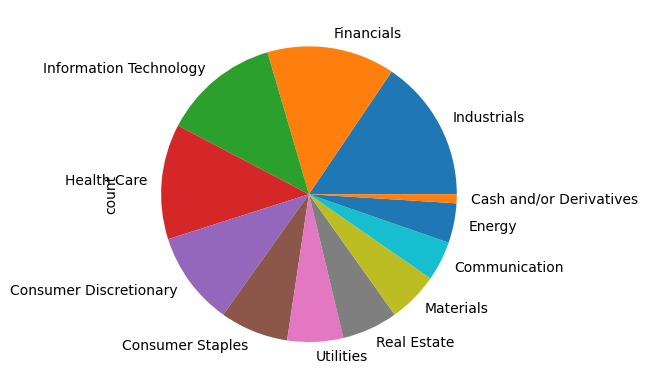

In [ ]:
df.Sector.value_counts().plot(kind='pie')

<Axes: ylabel='Market Value'>

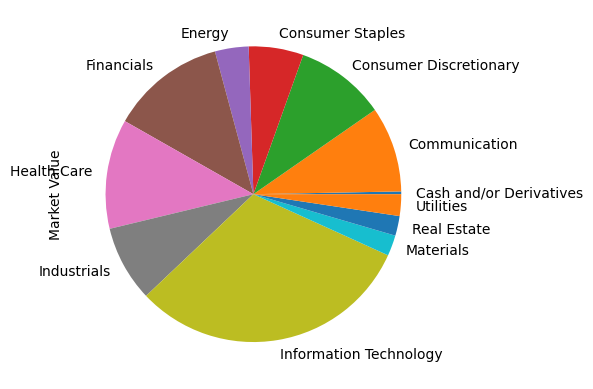

In [ ]:
# The above code is a pie chart by stock counts.
# Now create a pie chart that is weighted by market value.
# Your code
df.groupby('Sector')['Market Value'].sum().plot(kind = 'pie')

In [ ]:
# Finding:
# Here we can see that IT industry has a much more market value than just ticker Counts.
# Whereas Industrials have more value counts than other sectors

# Correlation Matrix and Heat Maps
4. Perform data prepping and scrubbing on sector weight data over a 20-year period and convert the data provided as a string to a pandas dataframe with numerical value types.
5. Calculate a correlation matrix of the sector weights and plot a heat map.
6. Discuss which pairs of sectors have high correlations and which pairs have low correlations, and provide a story as to why this might be the case.


In [ ]:
datastring='''
	2021	2020	2019	2018	2017	2016	2015	2014	2013	2012	2011	2010	2009	2008	2007	2006	2005	2004	2003	2002
Communication Services	15%	14%	14%	13%	13%	13%	13%	10%	38%	33%	33%	32%	35%	26%	34%	27%	26%	16%	5%	5%
Consumer Discretionary	13%	13%	10%	10%	10%	9%	10%	9%	6%	6%	6%	6%	5%	4%	4%	5%	5%	7%	6%	5%
Consumer Staples	6%	7%	8%	8%	9%	10%	10%	10%	7%	8%	9%	8%	8%	10%	7%	8%	8%	10%	12%	13%
Energy	3%	2%	4%	4%	5%	6%	6%	7%	6%	7%	7%	7%	7%	9%	8%	8%	7%	7%	7%	7%
Financials	11%	10%	13%	13%	15%	15%	14%	16%	11%	11%	10%	12%	12%	12%	13%	17%	17%	19%	20%	20%
Health Care	13%	12%	13%	14%	12%	12%	14%	14%	9%	8%	8%	8%	9%	10%	9%	9%	10%	12%	15%	15%
Industrials	7%	8%	8%	8%	9%	10%	9%	10%	7%	7%	7%	8%	7%	8%	8%	9%	10%	11%	12%	12%
Information Technology	25%	26%	23%	22%	19%	17%	16%	16%	11%	14%	13%	12%	12%	13%	10%	11%	11%	13%	17%	16%
Materials	2%	2%	2%	2%	2%	2%	2%	2%	2%	2%	2%	2%	2%	2%	2%	2%	2%	2%	2%	2%
Real Estate	3%	2%	3%	3%	3%	3%	3%	3%	2%	2%	2%	2%	1%	1%	1%	2%	1%	1%	1%	1%
Utilities	2%	2%	3%	3%	3%	3%	3%	3%	2%	2%	3%	2%	2%	3%	3%	3%	3%	3%	3%	3%
'''


In [ ]:
data = []
for i in datastring.strip().split("\n"):     #split by line
  data.append(i.split("\t"))        #split by tab space

In [ ]:
print(data)  #checking cleaned data

[['2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003', '2002'], ['Communication Services', '15%', '14%', '14%', '13%', '13%', '13%', '13%', '10%', '38%', '33%', '33%', '32%', '35%', '26%', '34%', '27%', '26%', '16%', '5%', '5%'], ['Consumer Discretionary', '13%', '13%', '10%', '10%', '10%', '9%', '10%', '9%', '6%', '6%', '6%', '6%', '5%', '4%', '4%', '5%', '5%', '7%', '6%', '5%'], ['Consumer Staples', '6%', '7%', '8%', '8%', '9%', '10%', '10%', '10%', '7%', '8%', '9%', '8%', '8%', '10%', '7%', '8%', '8%', '10%', '12%', '13%'], ['Energy', '3%', '2%', '4%', '4%', '5%', '6%', '6%', '7%', '6%', '7%', '7%', '7%', '7%', '9%', '8%', '8%', '7%', '7%', '7%', '7%'], ['Financials', '11%', '10%', '13%', '13%', '15%', '15%', '14%', '16%', '11%', '11%', '10%', '12%', '12%', '12%', '13%', '17%', '17%', '19%', '20%', '20%'], ['Health Care', '13%', '12%', '13%', '14%', '12%', '12%', '14%', '14%', '9%', '8

In [ ]:
df = pd.DataFrame(columns = data[0])  #setting columns names

In [ ]:
data.pop(0)

['2021',
 '2020',
 '2019',
 '2018',
 '2017',
 '2016',
 '2015',
 '2014',
 '2013',
 '2012',
 '2011',
 '2010',
 '2009',
 '2008',
 '2007',
 '2006',
 '2005',
 '2004',
 '2003',
 '2002']

In [ ]:
#creating index and adding data to dataframe
index = []
for i in data:
  i[1:] = [(float(x.strip('%'))/100) for x in i[1:]]
  index.append(i[0])
  df.loc[len(df)] = i[1:]

In [ ]:
df.index = index

In [ ]:
df

,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002
Communication Services,0.15,0.14,0.14,0.13,0.13,0.13,0.13,0.10,0.38,0.33,0.33,0.32,0.35,0.26,0.34,0.27,0.26,0.16,0.05,0.05
Consumer Discretionary,0.13,0.13,0.10,0.10,0.10,0.09,0.10,0.09,0.06,0.06,0.06,0.06,0.05,0.04,0.04,0.05,0.05,0.07,0.06,0.05
Consumer Staples,0.06,0.07,0.08,0.08,0.09,0.10,0.10,0.10,0.07,0.08,0.09,0.08,0.08,0.10,0.07,0.08,0.08,0.10,0.12,0.13
Energy,0.03,0.02,0.04,0.04,0.05,0.06,0.06,0.07,0.06,0.07,0.07,0.07,0.07,0.09,0.08,0.08,0.07,0.07,0.07,0.07
Financials,0.11,0.10,0.13,0.13,0.15,0.15,0.14,0.16,0.11,0.11,0.10,0.12,0.12,0.12,0.13,0.17,0.17,0.19,0.20,0.20
Health Care,0.13,0.12,0.13,0.14,0.12,0.12,0.14,0.14,0.09,0.08,0.08,0.08,0.09,0.10,0.09,0.09,0.10,0.12,0.15,0.15
Industrials,0.07,0.08,0.08,0.08,0.09,0.10,0.09,0.10,0.07,0.07,0.07,0.08,0.07,0.08,0.08,0.09,0.10,0.11,0.12,0.12
Information Technology,0.25,0.26,0.23,0.22,0.19,0.17,0.16,0.16,0.11,0.14,0.13,0.12,0.12,0.13,0.10,0.11,0.11,0.13,0.17,0.16
Materials,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02
Real Estate,0.03,0.02,0.03,0.03,0.03,0.03,0.03,0.03,0.02,0.02,0.02,0.02,0.01,0.01,0.01,0.02,0.01,0.01,0.01,0.01


In [ ]:
df.corr() #correlation matrix

,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002
2021,1.000000,0.993144,0.979753,0.973155,0.928659,0.871968,0.878188,0.798542,0.506344,0.591009,0.555847,0.552896,0.534992,0.587231,0.473730,0.534740,0.557699,0.661235,0.593491,0.544447
2020,0.993144,1.000000,0.974431,0.966173,0.920400,0.864026,0.862194,0.787433,0.461651,0.552987,0.520020,0.513140,0.492683,0.552896,0.427412,0.489021,0.516178,0.636449,0.600345,0.552322
2019,0.979753,0.974431,1.000000,0.996844,0.974983,0.939592,0.933026,0.881457,0.514601,0.605309,0.570077,0.574901,0.557851,0.642251,0.506455,0.596303,0.624469,0.764351,0.718028,0.680114
2018,0.973155,0.966173,0.996844,1.000000,0.976550,0.943800,0.946289,0.902851,0.482832,0.570880,0.535343,0.542708,0.527089,0.617919,0.477361,0.573294,0.606128,0.769088,0.748470,0.711536
2017,0.928659,0.920400,0.974983,0.976550,1.000000,0.988433,0.975122,0.949060,0.524455,0.610185,0.574120,0.596945,0.574716,0.671145,0.536632,0.661899,0.693914,0.870801,0.809912,0.779860
2016,0.871968,0.864026,0.939592,0.943800,0.988433,1.000000,0.984315,0.968560,0.550087,0.631211,0.598700,0.627503,0.605202,0.715482,0.576661,0.708604,0.743064,0.922260,0.846110,0.825900
2015,0.878188,0.862194,0.933026,0.946289,0.975122,0.984315,1.000000,0.967891,0.551160,0.620945,0.592050,0.616200,0.600182,0.703976,0.568245,0.684599,0.721988,0.899066,0.822555,0.801896
2014,0.798542,0.787433,0.881457,0.902851,0.949060,0.968560,0.967891,1.000000,0.378864,0.459088,0.423083,0.462006,0.442232,0.581520,0.422773,0.584353,0.628368,0.895317,0.933463,0.916193
2013,0.506344,0.461651,0.514601,0.482832,0.524455,0.550087,0.551160,0.378864,1.000000,0.989133,0.991345,0.992155,0.994889,0.944921,0.988654,0.937451,0.922093,0.655144,0.110044,0.108909
2012,0.591009,0.552987,0.605309,0.570880,0.610185,0.631211,0.620945,0.459088,0.989133,1.000000,0.997508,0.996178,0.994944,0.968970,0.981101,0.946620,0.931662,0.701473,0.195634,0.190711


In [ ]:
matrix = df.transpose().corr().dropna(axis=0, how='all').dropna(axis=1, how='all')     #correlation matrix and removing nulls in the matrix
matrix

,Communication Services,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Real Estate,Utilities
Communication Services,1.000000,-0.546711,-0.567161,0.399402,-0.563610,-0.951565,-0.684543,-0.651245,-3.193983e-01,-4.425607e-01
Consumer Discretionary,-0.546711,1.000000,-0.271198,-0.907632,-0.259116,0.520201,-0.135589,0.894787,7.613555e-01,-1.707762e-01
Consumer Staples,-0.567161,-0.271198,1.000000,0.408995,0.721598,0.522133,0.806072,-0.128321,-2.473637e-01,5.677538e-01
Energy,0.399402,-0.907632,0.408995,1.000000,0.342551,-0.403779,0.239544,-0.896414,-5.905056e-01,3.297751e-01
Financials,-0.563610,-0.259116,0.721598,0.342551,1.000000,0.520746,0.946871,-0.181699,-3.062629e-01,6.045884e-01
Health Care,-0.951565,0.520201,0.522133,-0.403779,0.520746,1.000000,0.616912,0.621164,3.001126e-01,4.018139e-01
Industrials,-0.684543,-0.135589,0.806072,0.239544,0.946871,0.616912,1.000000,-0.051765,-2.652391e-01,5.880276e-01
Information Technology,-0.651245,0.894787,-0.128321,-0.896414,-0.181699,0.621164,-0.051765,1.000000,5.791917e-01,-1.126419e-01
Real Estate,-0.319398,0.761355,-0.247364,-0.590506,-0.306263,0.300113,-0.265239,0.579192,1.000000e+00,3.181296e-16
Utilities,-0.442561,-0.170776,0.567754,0.329775,0.604588,0.401814,0.588028,-0.112642,3.181296e-16,1.000000e+00


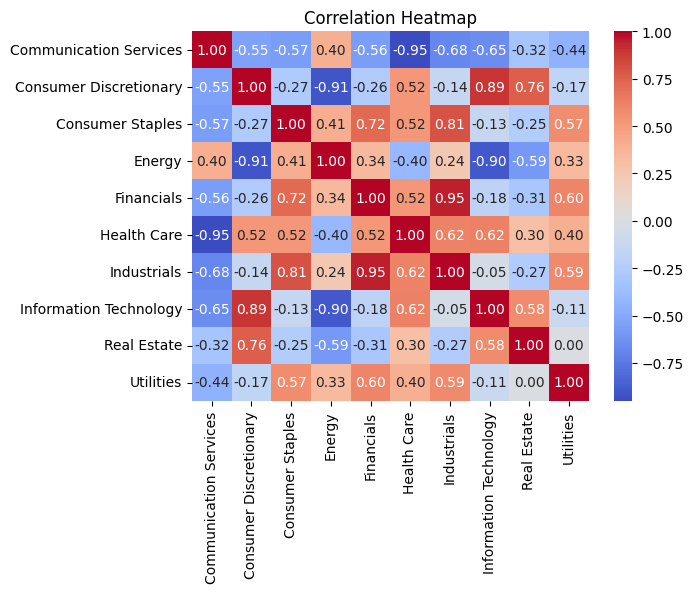

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#using seaborn for correlation matrix
sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Findings
# Here we can see that 95% correlation between industrials and Financials and healthcare has negative 95% correaltion with communication services
# we can also see energy and consumer services , and IT has negative 90% correlation.
# this suggests that the respective sectors gain weight/ lose weight in an year according to the other sector.


# Histograms and Conditional Distributions
7. Plot a histogram of the weights of the Consumer Discretionary in the past years, and estimate the probability density function (PDF) using kernel density estimation (KDE).
8. Calculate the average sector weight of the Energy sector and condition your previous analysis on years where the Energy sector had above average weighing and below average weighing.
9. Analyze if there is a difference in the PDF of Consumer Discretionary weights when conditioned by Energy weights, and provide a story as to why this might be the case.


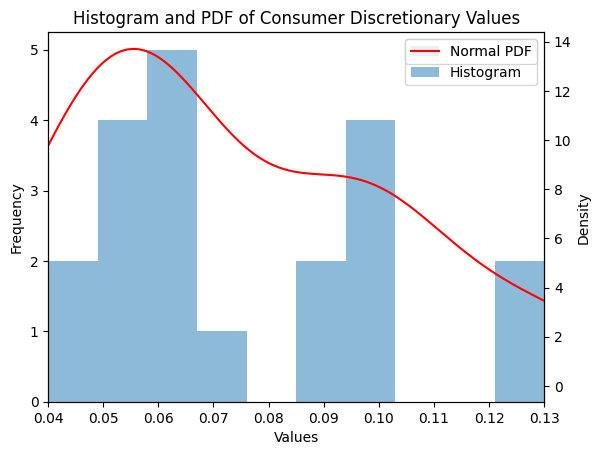

In [ ]:
fig, ax1 = plt.subplots() #using subplots to get same x-axis
df.iloc[1,:].plot(kind='hist', ax=ax1, alpha=0.5)
ax1.set_xlim((df.iloc[1,:].min(), df.iloc[1,:].max()))   #limiting X values
plt.xlabel('Values')

ax2 = ax1.twinx()     #funtion to get same x axis
df.iloc[1,:].plot(kind='kde', ax=ax2, color='red')
plt.title("Histogram and PDF of Consumer Discretionary Values")
ax1.legend(labels=["Normal PDF","Histogram"])
ax2.legend(labels=["Normal PDF"])
plt.show()

In [ ]:
# Calculate average weight of the Energy sector
avg_energy = df.iloc[3,:].mean()

# Condition analysis on Energy sector weights
above_avg = df.iloc[1,:][df.iloc[3,:] > avg_energy]
below_avg = df.iloc[1,:][df.iloc[3,:] < avg_energy]

Text(0, 0.5, 'Density')

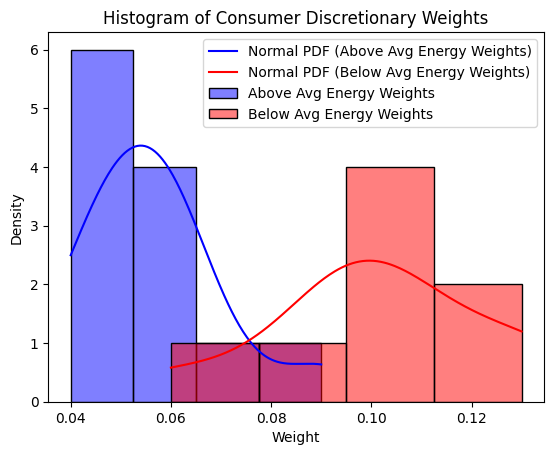

In [ ]:
# Plot histogram of Consumer Discretionary weights
plt.figure()
#using seaborn to simplify the results
sns.histplot(above_avg, bins = 4 , kde=True, color='blue')
sns.histplot(below_avg, bins = 4, kde=True, color='Red')
plt.legend(labels=["Normal PDF (Above Avg Energy Weights)","Normal PDF (Below Avg Energy Weights)","Above Avg Energy Weights","Below Avg Energy Weights"])
plt.title('Histogram of Consumer Discretionary Weights')
plt.xlabel('Weight')
plt.ylabel('Density')

In [ ]:
# Findings
# There is huge dip in the center of the graph when using average energy weights,
# this might suggest a negavtive correlation between the two sectors weights indicating if one rise, the other falls and vice versa.


# Story telling: Predictions for the future
10. Add a datapoint assuming that Information Technology has a sector weight of 32% in 2000, and you may estimate the weights of the other sectors, if you wish, by assuming they are in the same proportion to 2002. Also add the sector weights for the latest year using data you just downloaded from ishares.
10. Plot the sector weights over time for the various sectors.
11. Predict which sectors will stay at roughly a fixed weight of the economy as proxyed by the S&P 500 and which sectors would fluctuate over time, and give a story as to why this is your prediction.
12. Analyze the sector weights around the Global Financial crisis in 2007/2008 and the Dotcom bubble in 2000. Based on this, make a prediction on where we currently stand in terms of sectors that might be poised for a fall or a rise.
13. Suggest sectors one might want to invest or work in in the next few years. It could be that we are at an inflection point, or it could also be that some sectors have a few good years left before a decline. In any case, a new graduate might still want to work in an industry regardless of forecast. In that case, recommend strategies to ride the long term economic cycles that you see.



## Bloomberg SPX Sector Data

You can spot check your data with Bloomberg, and comment on the quality of your data. Make any adjustments needed for your story to be verified with Bloomberg.
* https://drive.google.com/drive/folders/1YhNtKGWh91evkREmLTjouydpgWBiw90I?usp=sharing


In [ ]:
# your code
tech = 0.32
to_others = (1 - 0.32)/(1-0.16)    #ratio to account for percentage change

twoK = []
for i in df['2002']:
  if i != 0.16:
    i = i*to_others
  else :
    i = 0.32
  twoK.append(i)

df['2000'] = twoK
df['2000']

Communication Services    0.040476
Consumer Discretionary    0.040476
Consumer Staples          0.105238
Energy                    0.056667
Financials                0.161905
Health Care               0.121429
Industrials               0.097143
Information Technology    0.320000
Materials                 0.016190
Real Estate               0.008095
Utilities                 0.024286
Name: 2000, dtype: float64

In [ ]:
df.T[::-1]  #viewing the dataframe

,Communication Services,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Utilities
2000,0.040476,0.040476,0.105238,0.056667,0.161905,0.121429,0.097143,0.32,0.01619,0.008095,0.024286
2002,0.050000,0.050000,0.130000,0.070000,0.200000,0.150000,0.120000,0.16,0.02000,0.010000,0.030000
2003,0.050000,0.060000,0.120000,0.070000,0.200000,0.150000,0.120000,0.17,0.02000,0.010000,0.030000
2004,0.160000,0.070000,0.100000,0.070000,0.190000,0.120000,0.110000,0.13,0.02000,0.010000,0.030000
2005,0.260000,0.050000,0.080000,0.070000,0.170000,0.100000,0.100000,0.11,0.02000,0.010000,0.030000
2006,0.270000,0.050000,0.080000,0.080000,0.170000,0.090000,0.090000,0.11,0.02000,0.020000,0.030000
2007,0.340000,0.040000,0.070000,0.080000,0.130000,0.090000,0.080000,0.10,0.02000,0.010000,0.030000
2008,0.260000,0.040000,0.100000,0.090000,0.120000,0.100000,0.080000,0.13,0.02000,0.010000,0.030000
2009,0.350000,0.050000,0.080000,0.070000,0.120000,0.090000,0.070000,0.12,0.02000,0.010000,0.020000
2010,0.320000,0.060000,0.080000,0.070000,0.120000,0.080000,0.080000,0.12,0.02000,0.020000,0.020000


In [ ]:
list(df.T[::-1].columns)   #checking columns

['Communication Services',
 'Consumer Discretionary',
 'Consumer Staples',
 'Energy',
 'Financials',
 'Health Care',
 'Industrials',
 'Information Technology',
 'Materials',
 'Real Estate',
 'Utilities']

In [ ]:
import plotly.express as px
fig = px.line(df.T[::-1], markers=True, title='Sector Proportions Over Time')     #time series graph
fig.show()

In [ ]:
# Findings :

# Materials Sector will stay at roughly a fixed weight of the economy as proxyed by the S&P 500

# IT and Consumer services sectors would fluctuate over time, as we can see in the graph

# All scetors except finacial sector and materials sector are expected to fall in the similar conditions to 2008 financial crisis.

# Real estate , financial sector, health care, communication sectors would be good enough to invest for the next few years, this is due to their stable growth in recent years.

# Extra Credit

Load the data from Fred into pandas:
* Job Openings - Total
  * https://fred.stlouisfed.org/series/JTSJOL
* Job Openings - Professional and Business Services
  * https://fred.stlouisfed.org/series/JTS540099JOL

## Is there any relationship with the size of the Financial Sector as a share of the economy?

* Job Openings - Software Development
  * https://fred.stlouisfed.org/series/IHLIDXUSTPSOFTDEVE

## What about the current relationship between software jobs and the Information Technology Sector?



In [ ]:
url = 'https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1318&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=JTSJOL&scale=left&cosd=2020-02-01&coed=2024-04-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2024-06-09&revision_date=2024-06-09&nd=2000-12-01'

In [ ]:
total_df=pd.read_csv(url)
total_df.head()

,DATE,JTSJOL
0,2020-02-01,6974
1,2020-03-01,5924
2,2020-04-01,4637
3,2020-05-01,5593
4,2020-06-01,6156


In [ ]:
url = 'https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1319&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=JTS540099JOL&scale=left&cosd=2020-02-01&coed=2024-04-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2024-06-09&revision_date=2024-06-09&nd=2000-12-01'

In [ ]:
probiz_df = pd.read_csv(url)
probiz_df

,DATE,JTS540099JOL
0,2020-02-01,1290
1,2020-03-01,1089
2,2020-04-01,846
3,2020-05-01,1008
4,2020-06-01,1077
5,2020-07-01,1156
6,2020-08-01,1153
7,2020-09-01,1258
8,2020-10-01,1256
9,2020-11-01,1337


In [ ]:
url = 'https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1318&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=IHLIDXUSTPSOFTDEVE&scale=left&cosd=2020-02-01&coed=2024-04-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2024-06-09&revision_date=2024-06-09&nd=2020-02-01'

In [ ]:
software_df = pd.read_csv(url)
software_df.head()

,DATE,IHLIDXUSTPSOFTDEVE
0,2020-02-01,99.467586
1,2020-03-01,98.146129
2,2020-04-01,76.163000
3,2020-05-01,65.753548
4,2020-06-01,64.347000


In [ ]:
merge_df = total_df.merge(probiz_df, on='DATE').merge(software_df, on='DATE')
merge_df

,DATE,JTSJOL,JTS540099JOL,IHLIDXUSTPSOFTDEVE
0,2020-02-01,6974,1290,99.467586
1,2020-03-01,5924,1089,98.146129
2,2020-04-01,4637,846,76.163000
3,2020-05-01,5593,1008,65.753548
4,2020-06-01,6156,1077,64.347000
5,2020-07-01,6491,1156,66.321935
6,2020-08-01,6369,1153,69.996774
7,2020-09-01,6505,1258,73.480000
8,2020-10-01,6838,1256,77.807097
9,2020-11-01,6857,1337,83.740667


In [ ]:
merge_df.iloc[:,1:].corr() #checking correlation

,JTSJOL,JTS540099JOL,IHLIDXUSTPSOFTDEVE
JTSJOL,1.000000,0.967501,0.818490
JTS540099JOL,0.967501,1.000000,0.861893
IHLIDXUSTPSOFTDEVE,0.818490,0.861893,1.000000


In [ ]:
merge_df['DATE'] = pd.to_datetime(merge_df['DATE'])

In [ ]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   DATE                51 non-null     datetime64[ns]
 1   JTSJOL              51 non-null     int64         
 2   JTS540099JOL        51 non-null     int64         
 3   IHLIDXUSTPSOFTDEVE  51 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 1.7 KB


In [ ]:
fig = px.line(merge_df,x='DATE', y=['JTSJOL', 'JTS540099JOL','IHLIDXUSTPSOFTDEVE'], title='Job openings over time')
fig.show()

In [ ]:
# Findings
# We can see that the average job posting in software are very less compared to the financial sector , and when only looked at software industry alone, the jobs have fallen below the COVID levels.
# When looking at both the correlation and graph of Overall and Business sectors, we can see that they are highly correlated and one might affect another.

# Impact on GenAI

## Bain:
![](https://www.dropbox.com/scl/fi/qbixjj05btpqyy8garltz/AI-benefit-on-sectors.jpg?rlkey=b58bmv0kscdlfy6xxyudkfjor&raw=1)

## McKinsey

* https://www.msn.com/en-us/money/careers/ai-isn-t-yet-capable-of-snapping-up-jobs-except-in-these-4-industries-mckinsey-says/ar-BB1nCWBm?ocid=msedgdhp&pc=U531&cvid=daeb6147abc74b2885dcfa9fe95dbd4e&ei=72


# Looking deeper into actual companies that are hiring

The provided Excel sheet shows the largest companies in the US, their number of employees and the growth in employee count over the past 1 and 5 years. It also shows the profit per employee.

* Map the ticker to sector. You can do that with yfinance, or data from ETF vendors such as https://www.ishares.com/us/products/239726/ishares-core-sp-500-etf
* Which sector hired a lot in the past 5 years? What about the recent 1 year?
* Would the "year of efficiency" continue in perpetuity in the age of AI, leading to much higher profits per employee?
  * See what Meta has to say about AI, Employees, and Profits
  * https://www.seattletimes.com/business/facebook-owner-meta-to-pay-investors-for-first-time-after-profits-triple/



In [ ]:
!gdown 1ogaNDOGq4fNsW3XRQvtUgHaJ4iPJ-Pj9
import pandas as pd
blg_df = pd.read_excel('20240203_20240203_EQS_Employees_w_growth.xlsx',skiprows=2).iloc[1:-2]
blg_df

Downloading...
From: https://drive.google.com/uc?id=1ogaNDOGq4fNsW3XRQvtUgHaJ4iPJ-Pj9
To: /content/20240203_20240203_EQS_Employees_w_growth.xlsx
100% 171k/171k [00:00<00:00, 7.86MB/s]


,Ticker,Short Name,Market Cap,Number of Employees:Y,Sl/Empl T12M,Net Income Per 1000 Employees LF,"Avg of Daily Equity Traded Val over 1 Month:M[currency=LCL], 1, D)","Gr PoP of Number of Employees:Y:Y, -5)","Gr PoP of Number of Employees:Y:Y, -1)"
1,MSFT US Equity,MICROSOFT CORP,3.055544e+12,221000.0,NaN,NaN,1.011077e+10,68.702290,0.000000
2,AAPL US Equity,APPLE INC,2.869874e+12,161000.0,NaN,NaN,1.082338e+10,21.969697,-1.829268
3,AMZN US Equity,AMAZON.COM INC,1.784656e+12,1525000.0,3.857524e+05,6.966557,7.818787e+09,135.521236,-1.038287
4,GOOGL US Equity,ALPHABET INC-A,1.777293e+12,182502.0,1.669734e+06,113.352180,4.364628e+09,84.772858,-4.064468
5,GOOG US Equity,ALPHABET INC-C,1.777293e+12,182502.0,1.669734e+06,113.352180,3.169757e+09,84.772858,-4.064468
...,...,...,...,...,...,...,...,...,...
1732,TNK US Equity,TEEKAY TANK-CL A,2.011900e+09,NaN,NaN,NaN,3.062366e+07,NaN,NaN
1733,RXRX US Equity,RECURSION PHAR-A,2.005468e+09,NaN,NaN,NaN,7.242130e+07,NaN,NaN
1734,FRME US Equity,FIRST MERCHANTS,2.004970e+09,2124.0,NaN,NaN,8.360644e+06,26.128266,16.639209
1735,LAUR US Equity,LAUREATE EDUCATI,2.003287e+09,22000.0,NaN,NaN,9.455448e+06,144.444444,1122.222222


In [ ]:
tickers = blg_df['Ticker']   #creating a tickers list
tickers = [x.split(" ")[0] for x in tickers]  #only getting the ticker symbols
tickers = ["-".join(x.split("/")) for x in tickers]  #changing "/" to "-" such that yfinance will recognize the tickers (ex: "UHAL/B" to "UHAL-B")
blg_df['Ticker'] = tickers

In [ ]:
blg_df['Ticker']

1        MSFT
2        AAPL
3        AMZN
4       GOOGL
5        GOOG
        ...  
1732      TNK
1733     RXRX
1734     FRME
1735     LAUR
1736      EAT
Name: Ticker, Length: 1736, dtype: object

In [ ]:
import yfinance as yf

# Create an empty dictionary to store ticker-sector mappings
ticker_sector_map = {}

# Iterate through each ticker symbol
for ticker in tickers:
    try:
        # Fetch the ticker info from Yahoo Finance
        ticker_info = yf.Ticker(ticker)
        # Get the industry sector of the company
        sector = ticker_info.info.get('sector', 'N/A')
        # Store the mapping in the dictionary
        ticker_sector_map[ticker] = sector
    except Exception as e:
        print(f"Error fetching sector for {ticker}: {e}")

# Print the mapping of tickers to sectors
print("Ticker to Sector Mapping:")
for ticker, sector in ticker_sector_map.items():
    print(f"{ticker}: {sector}")

ERROR:yfinance:404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/GIB-A?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=GIB-A&crumb=E9bPIc1IVs7
ERROR:yfinance:404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/RCI-B?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=RCI-B&crumb=E9bPIc1IVs7
ERROR:yfinance:404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/TECK-B?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=TECK-B&crumb=E9bPIc1IVs7
ERROR:yfinance:404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SPLK?modules=financialData%2CquoteType%2Cdefault

Ticker to Sector Mapping:
MSFT: Technology
AAPL: Technology
AMZN: Consumer Cyclical
GOOGL: Communication Services
GOOG: Communication Services
NVDA: Technology
META: Communication Services
BRK-A: Financial Services
BRK-B: Financial Services
LLY: Healthcare
TSLA: Consumer Cyclical
AVGO: Technology
V: Financial Services
JPM: Financial Services
UNH: Healthcare
WMT: Consumer Defensive
MA: Financial Services
XOM: Energy
JNJ: Healthcare
PG: Consumer Defensive
HD: Consumer Cyclical
MRK: Healthcare
ORCL: Technology
COST: Consumer Defensive
ABBV: Healthcare
CVX: Energy
AMD: Technology
ADBE: Technology
CRM: Technology
BAC: Financial Services
KO: Consumer Defensive
ACN: Technology
NFLX: Communication Services
PEP: Consumer Defensive
MCD: Consumer Cyclical
TMO: Healthcare
CSCO: Technology
LIN: Basic Materials
ABT: Healthcare
TMUS: Communication Services
RY: Financial Services
DHR: Healthcare
INTC: Technology
CMCSA: Communication Services
INTU: Technology
DIS: Communication Services
VZ: Communicati

In [ ]:
sectors = pd.DataFrame.from_dict(ticker_sector_map, orient='index', columns=['Sector']).reset_index()
sectors = sectors.rename(columns={'index': 'Ticker'})

In [ ]:
sectors

,Ticker,Sector
0,MSFT,Technology
1,AAPL,Technology
2,AMZN,Consumer Cyclical
3,GOOGL,Communication Services
4,GOOG,Communication Services
...,...,...
1670,TNK,Energy
1671,RXRX,Healthcare
1672,FRME,Financial Services
1673,LAUR,Consumer Defensive


In [ ]:
blg_df = pd.merge(blg_df, sectors, on='Ticker', how='left')

In [ ]:
blg_df

,Ticker,Short Name,Market Cap,Number of Employees:Y,Sl/Empl T12M,Net Income Per 1000 Employees LF,"Avg of Daily Equity Traded Val over 1 Month:M[currency=LCL], 1, D)","Gr PoP of Number of Employees:Y:Y, -5)","Gr PoP of Number of Employees:Y:Y, -1)",Sector
0,MSFT,MICROSOFT CORP,3.055544e+12,221000.0,NaN,NaN,1.011077e+10,68.702290,0.000000,Technology
1,AAPL,APPLE INC,2.869874e+12,161000.0,NaN,NaN,1.082338e+10,21.969697,-1.829268,Technology
2,AMZN,AMAZON.COM INC,1.784656e+12,1525000.0,3.857524e+05,6.966557,7.818787e+09,135.521236,-1.038287,Consumer Cyclical
3,GOOGL,ALPHABET INC-A,1.777293e+12,182502.0,1.669734e+06,113.352180,4.364628e+09,84.772858,-4.064468,Communication Services
4,GOOG,ALPHABET INC-C,1.777293e+12,182502.0,1.669734e+06,113.352180,3.169757e+09,84.772858,-4.064468,Communication Services
...,...,...,...,...,...,...,...,...,...,...
1731,TNK,TEEKAY TANK-CL A,2.011900e+09,NaN,NaN,NaN,3.062366e+07,NaN,NaN,Energy
1732,RXRX,RECURSION PHAR-A,2.005468e+09,NaN,NaN,NaN,7.242130e+07,NaN,NaN,Healthcare
1733,FRME,FIRST MERCHANTS,2.004970e+09,2124.0,NaN,NaN,8.360644e+06,26.128266,16.639209,Financial Services
1734,LAUR,LAUREATE EDUCATI,2.003287e+09,22000.0,NaN,NaN,9.455448e+06,144.444444,1122.222222,Consumer Defensive


In [ ]:
blg_df['Sector'].unique()

array(['Technology', 'Consumer Cyclical', 'Communication Services',
       'Financial Services', 'Healthcare', 'Consumer Defensive', 'Energy',
       'Basic Materials', 'Industrials', 'Utilities', 'N/A',
       'Real Estate'], dtype=object)

In [ ]:
five_years = blg_df.groupby('Sector')['Gr PoP of Number of Employees:Y:Y, -5)'].sum().sort_values(ascending=False)
px.bar(five_years, color=five_years.index)

In [ ]:
one_year = blg_df.groupby('Sector')['Gr PoP of Number of Employees:Y:Y, -1)'].sum().sort_values(ascending=False)
px.bar(one_year, color=one_year.index)

In [ ]:
#Findings
# In past 1 year we can see that Healthcare and Technology leading in the growth of employees.
# And when seen the past 5Yr graph , we can see that Industrials used to lead but have declined significantly.
# And when seen the recent layoffs and use of AI, it might significantly boost the company's efficiency (net per person).